In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os  
from datetime import datetime
%matplotlib inline

***SEABORN***

In [39]:
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})

***PLOTLY***

In [40]:
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)
from plotly import graph_objects as go

**READ ALL THE CSV**

reads all the CSV files in the path and returns a dictionary. ignore_list contains the files to be ignored

In [41]:
def readallCSV(path,ignore_list=[]):
    allCSV={}
    for i in os.listdir(path):
        if i not in ignore_list:
            df=pd.read_csv(path+i)
            df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
            df.set_index(["Date"])
            allCSV[i[0:-4]]=df        
    print(allCSV.keys())
    return allCSV

In [42]:
allCSV=readallCSV('./Small_Data/',['stock_metadata.csv'])

dict_keys(['TATASTEEL', 'ADANIPORTS', 'BPCL', 'ONGC', 'POWERGRID', 'HDFC', 'TATAMOTORS', 'TITAN', 'HEROMOTOCO', 'ASIANPAINT', 'JSWSTEEL', 'GAIL', 'BAJAJ-AUTO', 'BHARTIARTL', 'TECHM', 'BAJFINANCE', 'NIFTY50_all', 'IOC', 'SHREECEM', 'EICHERMOT', 'KOTAKBANK', 'HDFCBANK', 'HCLTECH', 'BAJAJFINSV', 'HINDUNILVR', 'ZEEL', 'BRITANNIA', 'CIPLA', 'UPL', 'NTPC', 'NESTLEIND', 'WIPRO', 'COALINDIA', 'ICICIBANK', 'SBIN', 'HINDALCO', 'ITC', 'MARUTI', 'RELIANCE', 'INFY', 'SUNPHARMA', 'LT', 'VEDL', 'INFRATEL', 'DRREDDY', 'GRASIM', 'INDUSINDBK', 'MM', 'TCS', 'AXISBANK', 'ULTRACEMCO'])


**Print Number of NAN values in each column for all DFS**

In [43]:
for df in allCSV:
    print(df)
    print(allCSV[df].shape)
    for i in allCSV[df].columns:
        print(i,allCSV[df][i].isnull().sum(),sep=' = ')
    print("\n\n\n")

TATASTEEL
(5141, 15)
Date = 0
Symbol = 0
Series = 0
Prev Close = 0
Open = 0
High = 0
Low = 0
Last = 0
Close = 0
VWAP = 0
Volume = 0
Turnover = 0
Trades = 2850
Deliverable Volume = 514
%Deliverble = 514




ADANIPORTS
(3157, 15)
Date = 0
Symbol = 0
Series = 0
Prev Close = 0
Open = 0
High = 0
Low = 0
Last = 0
Close = 0
VWAP = 0
Volume = 0
Turnover = 0
Trades = 866
Deliverable Volume = 0
%Deliverble = 0




BPCL
(5141, 15)
Date = 0
Symbol = 0
Series = 0
Prev Close = 0
Open = 0
High = 0
Low = 0
Last = 0
Close = 0
VWAP = 0
Volume = 0
Turnover = 0
Trades = 2850
Deliverable Volume = 509
%Deliverble = 509




ONGC
(5141, 15)
Date = 0
Symbol = 0
Series = 0
Prev Close = 0
Open = 0
High = 0
Low = 0
Last = 0
Close = 0
VWAP = 0
Volume = 0
Turnover = 0
Trades = 2850
Deliverable Volume = 509
%Deliverble = 509




POWERGRID
(3194, 15)
Date = 0
Symbol = 0
Series = 0
Prev Close = 0
Open = 0
High = 0
Low = 0
Last = 0
Close = 0
VWAP = 0
Volume = 0
Turnover = 0
Trades = 903
Deliverable Volume = 0
%Deliverb

* **Data** - Represents the Data
* **Symbol** - Represents the symbol which represents the entity
* **Series** - EQ refers to Equity
* **Prev Close** - Previous Working Day Close Price
* **Open** - Open price of the stock on that working day
* **Close** - Close price of the stock on that working day
* **High** - Highest price of the stock on that working day
* **Low** - Lowest price of the stock on that working day
* **Close** - Closing price of stock on that working day
* **VWAP** - The volume weighted average price is a trading benchmark used by traders that gives the average price a security has traded at throughout the day, based on both volume and price.
* **Volume** - Volume is the number of shares of a security traded during a given period of time
* **Turnover** - Share turnover is a measure of stock liquidity calculated by dividing the total number of shares traded over a period by the average number of shares outstanding for the period. *The higher the share turnover, the more liquid company shares are.*
* **Deliverable Volume**  - The total number of unique stocks transacted on a given day. This denotes *liquidity*
* **Deliverable Percentage** - The percentage of the total shares which were transacted on a given day

In [59]:
allCSV["HDFC"].head(11)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Residual
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.50,293.50,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.00,304.00,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.00,295.00,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.00,296.00,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN,NaN
5,2000-01-10,HDFC,EQ,286.55,292.0,296.00,285.00,288.40,287.20,289.42,133363,3.859779e+12,NaN,NaN,NaN,NaN
6,2000-01-11,HDFC,EQ,287.20,290.0,292.00,273.25,282.85,283.85,284.54,337411,9.600617e+12,NaN,NaN,NaN,NaN
7,2000-01-12,HDFC,EQ,283.85,287.0,293.00,284.50,285.25,285.60,287.60,222537,6.400217e+12,NaN,NaN,NaN,NaN
8,2000-01-13,HDFC,EQ,285.60,288.0,290.50,283.00,284.00,283.85,285.84,113238,3.236741e+12,NaN,NaN,NaN,NaN
9,2000-01-14,HDFC,EQ,283.85,284.0,294.00,276.25,291.00,286.55,283.60,152322,4.319905e+12,NaN,NaN,NaN,NaN


**CANDLE PLOT TIME SERIES**

Candlesticks for a given dataframe

In [45]:
def candle_plot(df):
    fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                    open=df['Open'], high=df['High'],
                    low=df['Low'], close=df['Close'])
                         ])
    fig.update_layout(xaxis_rangeslider_visible=True)
    fig.show()

In [46]:
hdfc = allCSV['HDFC']
candle_plot(allCSV['HDFC'])

In [47]:
allCSV['HDFC'].describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5.141000e+03,5.141000e+03,2291.000000,4.632000e+03,4632.000000
mean,1250.235295,1250.866553,1270.373556,1230.175170,1250.370064,1250.538903,1250.162379,1.764469e+06,2.373866e+14,97687.354867,1.292154e+06,0.657592
std,692.794341,692.954979,704.615342,680.761221,692.541757,692.707454,692.428824,2.980988e+06,3.291024e+14,55197.587466,2.584001e+06,0.127174
min,271.750000,284.000000,290.500000,273.250000,282.850000,283.850000,283.600000,2.919000e+03,1.834686e+11,973.000000,1.786000e+03,0.119000
25%,665.800000,665.450000,674.700000,657.400000,665.850000,666.050000,665.370000,2.896580e+05,2.275939e+13,59893.500000,2.560635e+05,0.582775
50%,1099.600000,1100.000000,1117.000000,1077.000000,1098.150000,1099.750000,1099.570000,1.239746e+06,1.611455e+14,86901.000000,9.622980e+05,0.672000
75%,1762.000000,1765.700000,1792.700000,1740.000000,1762.000000,1762.250000,1762.550000,2.623207e+06,3.189503e+14,122501.000000,1.885564e+06,0.744600
max,3180.150000,3148.000000,3262.000000,3100.550000,3178.000000,3180.150000,3166.580000,1.584141e+08,1.043773e+16,454758.000000,1.483131e+08,0.989400


**LINE PLOT**

The lineplot function plots the trend of the given field from start_date to end_date for the list of given companies

In [48]:
def strpdate(s):
    return datetime.strptime(s,'%d-%m-%Y')

def lineplot(field,start_date,end_date,allCSV,dflist=[]):
    for i in dflist:
        if i in allCSV:
            df=allCSV[i]
            rows=df[(df['Date']>=strpdate(start_date)) & (df['Date']<=strpdate(end_date))]
            fig = px.line(df, x='Date',y=field, title="Share value")
            fig.update_layout(xaxis_rangeslider_visible=True)
    fig.show()

In [49]:
lineplot('Close','28-10-2010','28-10-2015',allCSV,['HDFC','INFY','TATAMOTORS','TCS'])

In [50]:
lineplot('Trades','28-10-2019','28-10-2020',allCSV,['HDFC'])

In [51]:
lineplot('Volume','28-10-2019','28-10-2020',allCSV,['HDFC'])


In [52]:
def rollingMeanPlot(df, start_date, end_date, field):
    rolMean = df[field].rolling(window = 12).mean()
    rolStd = df[field].rolling(window = 12).std()
    rows=df[(df['Date']>=strpdate(start_date)) & (df['Date']<=strpdate(end_date))]
    sns.lineplot(x = rows['Date'],y=rows[field])
    sns.lineplot(x = rows['Date'], y = rolMean)
    plt.legend(labels=['Original Data', 'Rolling Mean'])

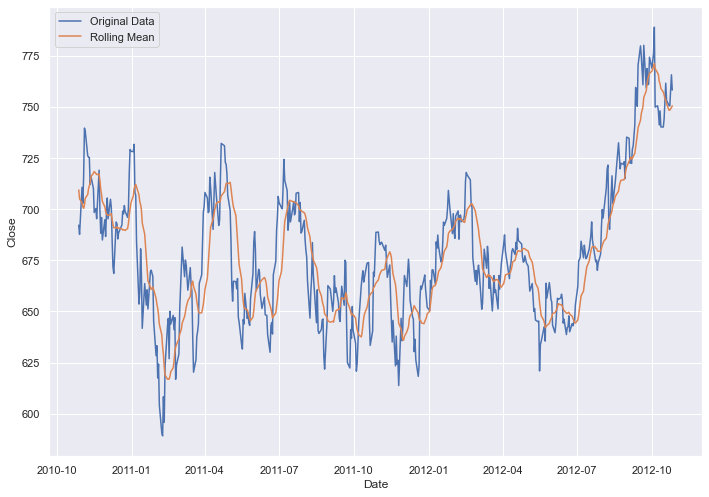

In [53]:
rollingMeanPlot(allCSV['HDFC'], '28-10-2010', '28-10-2012', "Close")

In [54]:
def rollingStdPlot(df, start_date, end_date, field):
    rolStd = df[field].rolling(window = 12).std()
    rows=df[(df['Date']>=strpdate(start_date)) & (df['Date']<=strpdate(end_date))]
    sns.lineplot(x = rows['Date'], y = rolStd)
    plt.legend(labels=['Rolling Standard Deviation'])

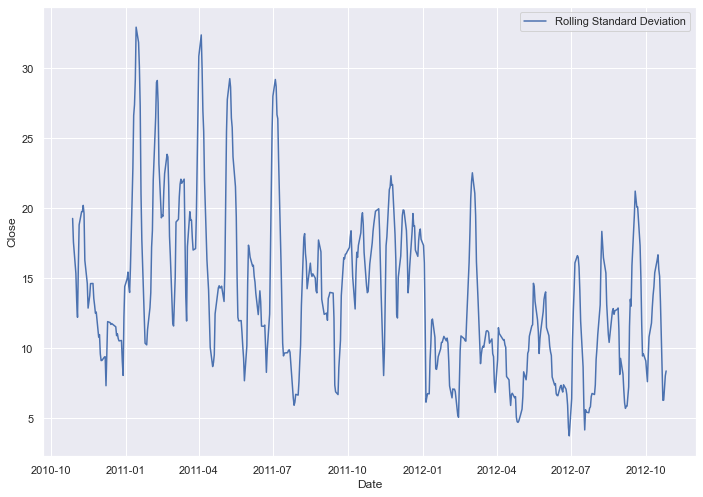

In [55]:
rollingStdPlot(allCSV['HDFC'], '28-10-2010', '28-10-2012', "Close")

In [56]:
def ResidualPlot(df, start_date, end_date, field):
    rolMean = df[field].rolling(window = 12).mean()
    rows=df[(df['Date']>=strpdate(start_date)) & (df['Date']<=strpdate(end_date))]
    df["Residual"] = rows[field] - rolMean
    fig = px.bar(rows, x = "Date", y = "Residual")
    fig.update_layout(xaxis_rangeslider_visible=True)
    fig.show()

In [57]:
ResidualPlot(hdfc, '28-10-2019', '28-10-2020', "Trades")

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'] but received: Residual